In [3]:
import medusa
from pickle import load
import pandas as pd
import json
import numpy

import matplotlib.pyplot as plt
import matplotlib

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.manifold import MDS

from skbio.stats.ordination import pcoa
from skbio.stats.distance import DissimilarityMatrix

In [10]:
gene_knockout_results = pd.read_csv(
        '../results/ensemble_gene_knockouts_newbiomass.tsv',sep='\t',index_col=0)
        
with open("../results/ensembles/psy_ensemble_500_SEED_newbiomass.pickle",'rb') as infile:
            ensemble = load(infile)

In [11]:
# Grab the features and states for the ensemble and convert to a dataframe
feature_dict = {}
for feature in ensemble.features:
    feature_dict[feature.id] = feature.states
feature_frame = pd.DataFrame.from_dict(feature_dict)

# Convert to a boolean dataframe for faster computation
# (0 values become False, all others become True (i.e. active features))
feature_frame = feature_frame.astype(bool)

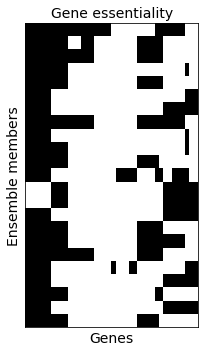

In [12]:
essentiality_ax = {}


# Remove genes with variable effects on growth across the ensemble
plotframe = gene_knockout_results

plotframe = plotframe > 1E-6
plotframe = plotframe.loc[(plotframe == 0).sum(axis=1) != len(plotframe.columns)]
plotframe = plotframe.loc[(plotframe == 1).sum(axis=1) < len(plotframe.columns)]
plotvals = plotframe.values

# reorder by heirarchical clustering of genes
dgram = dendrogram(linkage(pdist(plotvals,metric='hamming')),labels=plotframe.index,no_plot=True)
plotframe = plotframe.reindex(dgram['ivl'])
plotvals = plotframe.values

#plotvals = plotvals/plotvals.max()
rxn_labels = plotframe.index

# White cells are non-essential, clack cells are essential.
fig, ax = plt.subplots()
im = ax.imshow(plotvals.T,cmap='binary_r')
ax.set_ylabel('Ensemble members',size=14)
ax.set_xlabel('Genes',size=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Gene essentiality',size=14)
ax.set_aspect('auto')
fig.set_size_inches(3,5)
fig.tight_layout()

/anaconda3/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152 RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.1555819674643217 and the largest is 0.9921881121999647.


# of members in cluster 0: 12
# of members in cluster 1: 11
0.9565217391304348


,importance,fraction active in 0,fraction active in 1
rxn03005_c_upper_bound,0.111398,0.000000,1.000000
rxn03005_c_lower_bound,0.107421,0.000000,1.000000
rxn00688_c_lower_bound,0.071730,0.083333,1.000000
rxn01211_c_lower_bound,0.068848,0.000000,0.909091
rxn01211_c_upper_bound,0.065563,0.000000,0.909091
rxn00835_c_lower_bound,0.062994,0.916667,0.000000
rxn00688_c_upper_bound,0.062036,0.083333,1.000000
rxn00157_c_lower_bound,0.056756,0.916667,0.000000
rxn00835_c_upper_bound,0.054024,0.916667,0.000000
rxn00157_c_upper_bound,0.038861,0.916667,0.000000


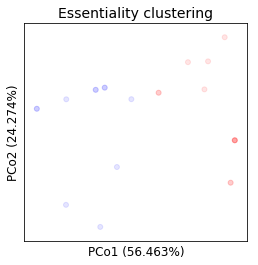

In [13]:
df_for_pca = gene_knockout_results

df_for_pca = df_for_pca > 1E-6
df_for_pca = df_for_pca.loc[(df_for_pca == False).sum(axis=1) != len(df_for_pca.columns)]
df_for_pca = df_for_pca.loc[(df_for_pca == True).sum(axis=1) < len(df_for_pca.columns)]
df_for_pca = df_for_pca.T

# perform kmeans clustering on the gene profiles to determine
# the two clusters with maximal variance
clust = KMeans(n_clusters = 2).fit(df_for_pca.values)

pca_input = DissimilarityMatrix(squareform(pdist(df_for_pca,metric="hamming")),ids=df_for_pca.index)
pcoa_result = pcoa(pca_input, number_of_dimensions=3)

# Add scores for each sample back to the dataframes
df_for_pca['PCo1'] = pcoa_result.samples['PC1'].values#mds_coords[:,0]#pc1
df_for_pca['PCo2'] = pcoa_result.samples['PC2'].values#mds_coords[:,1]#pc2
df_for_pca['cluster'] = clust.labels_

# grab the ensembles feature frame, fit the classifier
input_cols = feature_frame.columns
df_for_pca = df_for_pca.merge(feature_frame,left_index=True,right_index=True)
# perform regression using random forest
classifier = RandomForestClassifier(n_estimators=500, oob_score=True).fit(
    df_for_pca[input_cols],df_for_pca['cluster'])


# get variance explained for PC1/PC2
pc1_var = pcoa_result.proportion_explained[0]#pipe_w_scale.named_steps.pca.explained_variance_[0]
pc2_var = pcoa_result.proportion_explained[1]#pipe_w_scale.named_steps.pca.explained_variance_[1]

fig, ax = plt.subplots()
colors = ['red','blue']
clust_color = [colors[i] for i in df_for_pca['cluster']]
cmap=matplotlib.colors.ListedColormap(colors)
ax.scatter(df_for_pca['PCo1'],df_for_pca['PCo2'],marker='o',
        c=clust_color,cmap=cmap,alpha = 0.1,s=25)
ax.set_title('Essentiality clustering',fontsize=14)
ax.set_xlabel('PCo1 (%s%%)' % str(numpy.round(100*pc1_var,decimals=3)), fontsize=12)
ax.set_ylabel('PCo2 (%s%%)' % str(numpy.round(100*pc2_var,decimals=3)), fontsize=12)
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])
fig.set_size_inches(4,4)
#fig.savefig('../results/gene_knockout_pcoa_plots/'+species+'_gene_ko_pcoa.png')
#fig.savefig('../results/gene_knockout_pcoa_plots/'+species+'_gene_ko_pcoa.svg')

# Save the classifier importances, cluster labels, and % of each cluster
# that contain a feature
imp_frame = pd.DataFrame(classifier.feature_importances_,
                                index=feature_frame.columns).sort_values(
                                by=0,ascending=False)
imp_frame.columns = ['importance']

feature_matrix = pd.DataFrame()
for feature in imp_frame.index.tolist():
    feat_obj = ensemble.features.get_by_id(feature)
    feature_df = df = pd.DataFrame.from_dict(feat_obj.states,orient='index')
    # binarize the feature df
    feature_df = abs(feature_df) > 1E-6
    feature_df.columns = [feature]
    feature_matrix = feature_matrix.join(feature_df,how='outer')

# add cluster info to the feature matrix
feature_matrix = feature_matrix.join(pd.DataFrame(df_for_pca['cluster']),how='outer')
# Get the fraction of members in each cluster that contain each feature
frac = {}
for group,frame in feature_matrix.groupby('cluster'):
    frac[group] = frame.sum(axis=0)/len(frame.index)
    print('# of members in cluster '+str(group)+ ': ' +str(len(frame.index)))
    # add the fraction information to the importance frame
    imp_frame['fraction active in '+str(group)] = frac[group]

imp_frame.to_csv('../results/ensemble_learning_important_reactions_round2.csv',sep=',')

# save the cluster membership information
df_for_pca['cluster'].to_csv('../results/ensemble_learning_cluster_assignments_round2.csv',sep=',')

classifier_score = classifier.oob_score_
print(classifier_score)

imp_frame

In [16]:
model = ensemble.extract_member('PST_gapfilled_0')

In [20]:
import cobra
cobra.io.write_sbml_model(model, "../results/reconstructions/gapfilled_pto.xml")

Error encountered trying to <set model history>.
LibSBML error code -5: The object passed as an argument to the method is not of a type that is valid for the operation or kind of object involved. For example, handing an invalidly-constructed ASTNode to a method expecting an ASTNode will result in this error.
